# Written text as operational data

Written text is one type of data

### Why people write?

 - To communicate: their thoughts, feelings, urgency, needs, information

### Why people communicate?

1. To express emotions
1. To share information
1. To enable or elicit an action
1. ...

### We will use written text for the purpose other than 
1. To experience emotion
1. To learn something the author intended us to learn
1. To do what the author intended us to do

### Instead, we will use written text to recognize who wrote it
 - By calculating and comparing word frequencies in written documents
 
See, for example, likely fictional story https://medium.com/@amuse/how-the-nsa-caught-satoshi-nakamoto-868affcef595

### Example 1. Dictionaries in python (associative arrays)

Plot the frequency distribution of words on a web page.

In [26]:
import requests, re
# re is a module for regular expressions: to detect various combinations of characters
import operator

# Start from a simple document
r = requests .get('http://eecs.utk.edu')

# What comes back includes headers and other HTTP stuff, get just the body of the response
t = r.text

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf[w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

<!DOCTYPE	1
PUBLIC	1
"-//IETF//DTD	1
2.0//EN">	1
<html><head>	1
<title>403	1
Forbidden</title>	1
</head><body>	1
<h1>Forbidden</h1>	1
<p>You	1
don't	1
have	1
permission	1
to	1


### Example 2

Lots of markup in the output, lets remove it --- 

use BeautifulSoup and nltk modules and practice some regular expressions.

In [27]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator

# we may not care about the usage of stop words
stop_words = nltk.corpus.stopwords.words('english') + [
 'ut', '\'re','.', ',', '--', '\'s', '?', ')', '(', ':', '\'',
 '\"', '-', '}', '{', '&', '|', u'\u2014' ]

# We most likely would like to remove html markup
def cleanHtml (html):
    from bs4 import BeautifulSoup
    soup = BeautifulSoup(html, 'html.parser')
    return soup .get_text()

# We also want to remove special characters, quotes, etc. from each word
def cleanWord (w):
    # r in r'[.,"\']' tells to treat \ as a regular character 
    # but we need to escape ' with \'
    # any character between the brackets [] is to be removed 
    wn = re.sub('[,"\.\'&\|:@>*;/=]', "", w)
    # get rid of numbers
    return re.sub('^[0-9\.]*$', "", wn)
       
# define a function to get text/clean/calculate frequency
def get_wf (URL):
    # first get the web page
    r = requests .get(URL)
    
    # Now clean
    # remove html markup
    t = cleanHtml (r .text) .lower()
    
    # split string into an array of words using any sequence of spaces "\s+" 
    wds = re .split('\s+',t)
    
    # remove periods, commas, etc stuck to the edges of words
    for i in range(len(wds)):
        wds [i] = cleanWord (wds [i])
    
    # If satisfied with results, lets go to the next step: calculate frequencies
    # We can write a loop to create a dictionary, but 
    # there is a special function for everything in python
    # in particular for counting frequencies (like function table() in R)
    wf = Counter (wds)
    
    # Remove stop words from the dictionary wf
    for k in stop_words:
        wf. pop(k, None)
        
    #how many regular words in the document?
    tw = 0
    for w in wf:
       tw += wf[w] 
        
    
    # Get ordered list
    wfs = sorted (wf .items(), key = operator.itemgetter(1), reverse=True)
    ml = min(len(wfs),15)

    #Reverse the list because barh plots items from the bottom
    return (wfs [ 0:ml ] [::-1], tw)
        
# Now populate two lists    
(wf_ee, tw_ee) = get_wf('http://www.gutenberg.org/ebooks/1342.txt.utf-8')
(wf_bu, tw_bu) = get_wf('http://www.gutenberg.org/ebooks/76.txt.utf-8')

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - '/Users/brady/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/share/nltk_data'
    - '/usr/local/opt/python@3.9/Frameworks/Python.framework/Versions/3.9/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [28]:
#Plot the results: are there striking differences in language?
import numpy as np
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
def plotTwoLists (wf_ee, wf_bu, title):
    f = plt.figure (figsize=(10, 6))
    # this is painfully tedious....
    f .suptitle (title, fontsize=20)
    ax = f.add_subplot(111)
    ax .spines ['top'] .set_color ('none')
    ax .spines ['bottom'] .set_color ('none')
    ax .spines ['left'] .set_color ('none')
    ax .spines ['right'] .set_color ('none')
    ax .tick_params (labelcolor='w', top='off', bottom='off', left='off', right='off', labelsize=20)

    # Create two subplots, this is the first one
    ax1 = f .add_subplot (121)
    plt .subplots_adjust (wspace=.5)

    pos = np .arange (len(wf_ee)+1) 
    ax1 .tick_params (axis='both', which='major', labelsize=14)
    pylab .yticks (pos, [ x [0] for x in wf_ee ])
    ax1 .barh (range(len(wf_ee)), [ x [1] for x in wf_ee ], align='center')

    ax2 = f .add_subplot (122)
    ax2 .tick_params (axis='both', which='major', labelsize=14)
    pos = np .arange (len(wf_bu)+1) 
    pylab .yticks (pos, [ x [0] for x in wf_bu ])
    ax2 .barh (range (len(wf_bu)), [ x [1] for x in wf_bu ], align='center')

plotTwoLists (wf_ee, wf_bu, 'Difference between Pride and Prejudice and Huck Finn')

NameError: name 'wf_ee' is not defined

In [29]:
#In case Project gutenberg is blocked you can download text to your laptop and copy to the docker container via scp
#Assuming the file name you copy is pg4680.txt here is how you change the script
# Please note the option errors='replace'
# without it python invariably runs into unicode errors
f = open ('pg4680.txt', 'r', encoding="ascii", errors='replace')
    
# What comes back includes headers and other HTTP stuff, get just the body of the response
t = f.read()

# obtain words by splitting a string using as separator one or more (+) space/like characters (\s) 
wds = re.split('\s+',t)

# now populate a dictionary (wf)
wf = {}
for w in wds:
    if w in wf: wf [w] = wf [w] + 1
    else:  wf [w] = 1

# dictionaries can not be sorted, so lets get a sorted *list*        
wfs = sorted (wf .items(), key = operator .itemgetter (1), reverse=True)   

# lets just have no more than 15 words 
ml = min(len(wfs),15)
for i in range(1,ml,1):
    print (wfs[i][0]+"\t"+str(wfs[i][1]))  

and	2836
of	2676
to	2646
a	2217
in	1422
his	1205
he	928
that	920
was	823
for	798
with	797
as	672
I	505
you	497


# Assignment 1
For this project, I will compare the word frequency of the top 5 most downloaded books from Project Gutenburg of the last month versus 10 books chosen at random from Project Gutenburg.

Books from this week: 
1. Pride and Prejudice (https://www.gutenberg.org/files/1342/1342-h/1342-h.htm)
2. Frankenstein (https://www.gutenberg.org/files/84/84-h/84-h.htm)
3. The Adventures of Sherlock Holmes (https://www.gutenberg.org/files/1661/1661-h/1661-h.htm)
4. Alice's Adventures in Wonderland (https://www.gutenberg.org/files/11/11-h/11-h.htm)
5. History of the Warfare with Theology in Christendom (https://www.gutenberg.org/files/505/505-h/505-h.htm)

Books chosen at random (https://www.gutenberg.org/ebooks/search/?sort_order=random): 
1. A VOYAGE TO ARCTURUS.,https://www.gutenberg.org/files/1329/1329-h/1329-h.htm
2. FIVE HUNDRED DOLLARS,https://www.gutenberg.org/files/23006/23006-h/23006-h.htm
3. THE CENTAUR https://www.gutenberg.org/cache/epub/9964/pg9964.html
4. THE ARRIVAL OF JIMPSON (https://www.gutenberg.org/files/45689/45689-h/45689-h.htm)
5. MORE HUNTING WASPS (https://www.gutenberg.org/files/3462/3462-h/3462-h.htm)


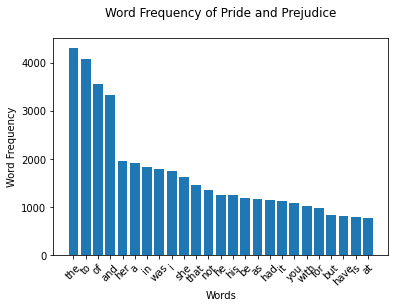

<Figure size 3000x2000 with 0 Axes>

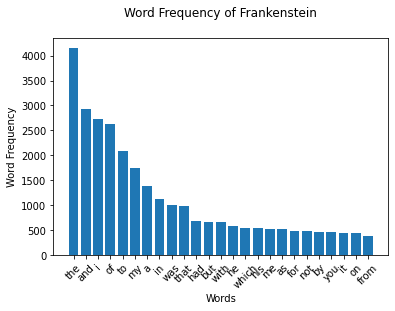

<Figure size 3000x2000 with 0 Axes>

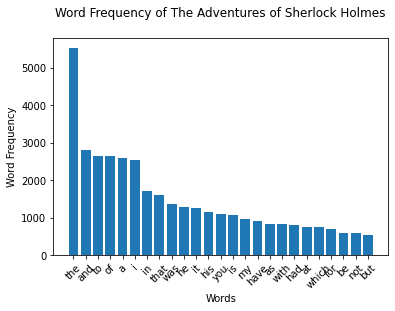

<Figure size 3000x2000 with 0 Axes>

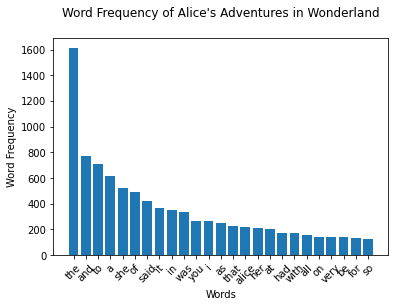

<Figure size 3000x2000 with 0 Axes>

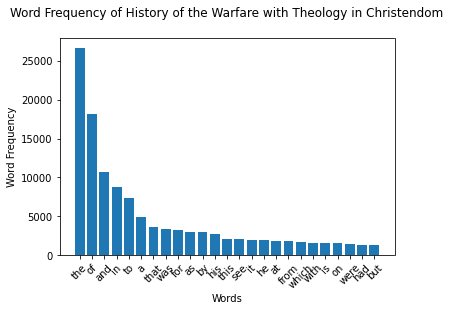

<Figure size 3000x2000 with 0 Axes>

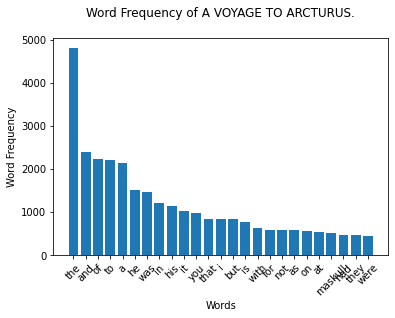

<Figure size 3000x2000 with 0 Axes>

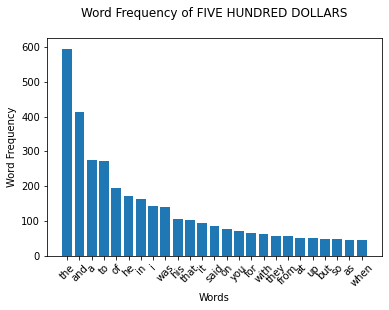

<Figure size 3000x2000 with 0 Axes>

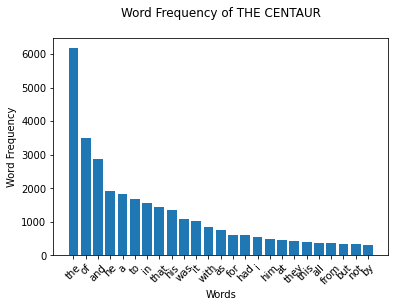

<Figure size 3000x2000 with 0 Axes>

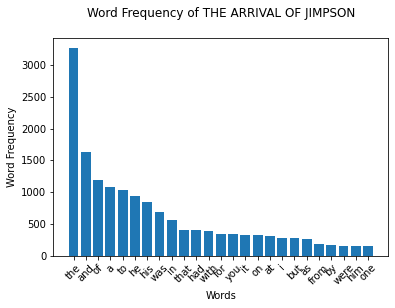

<Figure size 3000x2000 with 0 Axes>

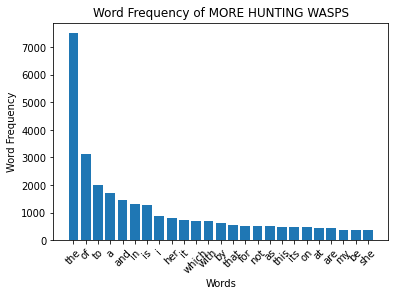

<Figure size 3000x2000 with 0 Axes>

In [43]:
from bs4 import BeautifulSoup
import requests
import collections
import time

def main():
    urlList = []
    titleList = []
    wordList = []
    # Open csv file and get first value
    with open('sitesToScrape.csv', 'r') as file:
        # Iterate through each line in the file
        fileIn = file.readlines()
        for line in fileIn:
            url, title = line.split(',')
            urlList.append(url)
            titleList.append(title)
    file.close()

    # Iterate through each url in the list
    for i in range(len(urlList)-5):
        page = requests.get(urlList[i])
        soup = BeautifulSoup(page.content, 'html.parser')
        text = soup.find_all(text=True)
        startIndex = 0
        endIndex = 0

        # Convert text to lowercase
        text = [line.lower() for line in text]
        for line in text:
            lineList = line.split()
            for j in range(len(lineList)):
                if j == len(lineList)-1:
                    break
                if lineList[j] == '***' and lineList[j+1] == 'start':
                    if startIndex == 0:
                        startIndex = text.index(line)
                if lineList[j] == '***' and lineList[j+1] == 'end':
                        endIndex = text.index(line)
                        break
        
        text = text[startIndex + 1:endIndex]
        removeCharNums = ',".&|:@,<>()*$?!\\/;=”“‘[]0123456789'
        stopwords = [' ut ', '\'re','.', ',', '--', '\'s','cf', '?', ')', '(', ':','\'','\"', '-', '}','â','£', '{', '&', '|', u'\u2014', '', ']' ]
        #lineCounter = 0
        fileName2 = "test.txt"
        #with open(fileName2, 'w') as outFile:    
        for line in text:
            for char in removeCharNums:
                line = line.replace(char, '')
            for word in stopwords:
                line = line.replace(word, '')
        # Double for loop to iterate through each word of each line
        allWords = [word for line in text for word in line.split()]
    
        wordList.append(allWords)
        #print("i:" + str(i))
        #print("Title" + titleList[i])
        # Very useful method from collections to count the number of times each word appears
        wordFrequencyTop = collections.Counter(allWords).most_common(25)
        #print(wordFrequencyTop)

        wordFrequencyTop.sort(key=lambda x: x[1], reverse=True)
        words = list(zip(*wordFrequencyTop))[0]
        values = list(zip(*wordFrequencyTop))[1]
        x_pos = np.arange(len(words))
        
        plt.bar(x_pos, values)
        plt.title("Word Frequency of " + titleList[i])
        plt.xticks(x_pos, words, rotation=45)
        plt.xlabel("Words")
        plt.ylabel("Word Frequency")
        plt.figure(dpi=500)
        plt.show()
        
    for i in range(5, len(urlList)):
        page = requests.get(urlList[i])
        soup = BeautifulSoup(page.content, 'html.parser')
        text = soup.find_all(text=True)
        startIndex = 0
        endIndex = 0
        # Convert text to lowercase
        text = [line.lower() for line in text]
        for line in text:
            lineList = line.split()
            for j in range(len(lineList)):
                if j == len(lineList)-1:
                    break
                if lineList[j] == '***' and lineList[j+1] == 'start':
                    if startIndex == 0:
                        startIndex = text.index(line)
                if lineList[j] == '***' and lineList[j+1] == 'end':
                        endIndex = text.index(line)
                        break

        
        text = text[startIndex + 1:endIndex]
        removeCharNums = ',".&|:@,<>()*$?!\\/;=”“‘[]0123456789'
        stopwords = [' ut ', '\'re','.', ',', '--', '\'s','cf', '?', ')', '(', ':','\'','\"', '-', '}','â','£', '{', '&', '|', u'\u2014', '', ']' ]
        #lineCounter = 0
        fileName2 = "test.txt"
        #with open(fileName2, 'w') as outFile:    
        for line in text:
            for char in removeCharNums:
                line = line.replace(char, '')
            for word in stopwords:
                line = line.replace(word, '')
        # Double for loop to iterate through each word of each line
        allWords = [word for line in text for word in line.split()]
        # Very useful method from collections to count the number of times each word appears
        wordFrequencyRandom = collections.Counter(allWords).most_common(25)
 
        #print("i:" + str(i))
        #print("Title" + titleList[i])
        # Very useful method from collections to count the number of times each word appears
        wordFrequencyRandom = collections.Counter(allWords).most_common(25)
        #print(wordFrequencyRandom)

        wordList.append(allWords)


        wordFrequencyRandom.sort(key=lambda x: x[1], reverse=True)
        words = list(zip(*wordFrequencyRandom))[0]
        values = list(zip(*wordFrequencyRandom))[1]
        x_pos = np.arange(len(words))
        
        plt.bar(x_pos, values)
        plt.xticks(x_pos, words, rotation=45)
        plt.title("Word Frequency of " + titleList[i])
        plt.xlabel("Words")
        plt.ylabel("Word Frequency")
        plt.figure(dpi=500)
        plt.show()

if __name__ == "__main__":
    main()